# Decision Tree Regressor

## Python version (sklearn)

http://scikit-learn.org/stable/auto_examples/tree/plot_iris.html#example-tree-plot-iris-py

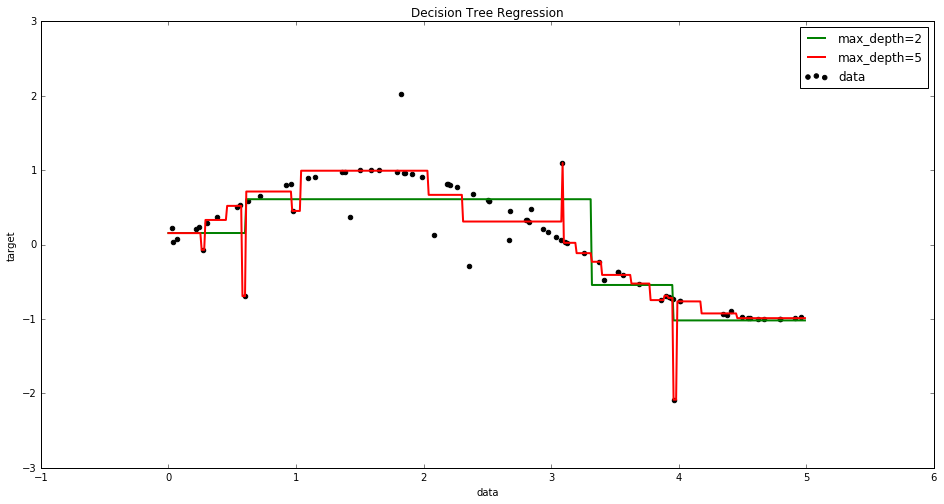

In [26]:
%matplotlib inline
import pylab
pylab.rcParams['figure.figsize'] = (16.0, 8.0)
import numpy as np
from sklearn.tree import DecisionTreeRegressor
import matplotlib.pyplot as plt

# Create a random dataset
rng = np.random.RandomState(1234)
X = np.sort(5 * rng.rand(80, 1), axis=0)
y = np.sin(X).ravel()
y[::5] += 3 * (0.5 - rng.rand(16))

# Fit regression model
regr_1 = DecisionTreeRegressor(max_depth=2)
regr_2 = DecisionTreeRegressor(max_depth=5)
regr_1.fit(X, y)
regr_2.fit(X, y)

# Predict
X_test = np.arange(0.0, 5.0, 0.01)[:, np.newaxis]
y_1 = regr_1.predict(X_test)
y_2 = regr_2.predict(X_test)

# Plot the results
plt.figure()
plt.scatter(X, y, c="k", label="data")
plt.plot(X_test, y_1, c="g", label="max_depth=2", linewidth=2)
plt.plot(X_test, y_2, c="r", label="max_depth=5", linewidth=2)
plt.xlabel("data")
plt.ylabel("target")
plt.title("Decision Tree Regression")
plt.legend()
plt.show()

## Crystal version (crystal-learn)

```ruby 
require "random"
require "../math"
require "../random"
require "../array"
require "../trees"
require "csv"

x = Random.sequence(80).map {|x| x * 5}
x.sort!
y = Math.sin(x)

seq = Random.sequence(16).map{|x| 3 * (0.5 - x)}
y.each_with_index do |e, i|
  y[i] += seq[i/5] if i%5 == 0
end

regr2 = ML::Classifiers::DecisionTreeRegressor.new(max_depth: 2)
regr5 = ML::Classifiers::DecisionTreeRegressor.new(max_depth: 5)

x = x.map {|xi| [xi]}

regr2.fit(x, y)
regr5.fit(x, y)

# Predict
x_test = ML.arange(0.0, 5.0, step: 0.01).map {|x| [x]}
y_pred2 = regr2.predict(x_test).map {|x| x.round(2)}
y_pred5 = regr5.predict(x_test).map {|x| x.round(2)}


f = File.open("regressor.csv", mode: "w")

result = CSV.build(f) do |csv|
  x.zip(y).each do |x_i, y_i|
    csv.row x_i[0], y_i, "true"
  end
  x_test.zip(y_pred2).each do |x_i, y_i|
    csv.row x_i[0], y_i, "pred_2"
  end
  x_test.zip(y_pred5).each do |x_i, y_i|
    csv.row x_i[0], y_i, "pred_5"
  end
end

f.close()
```


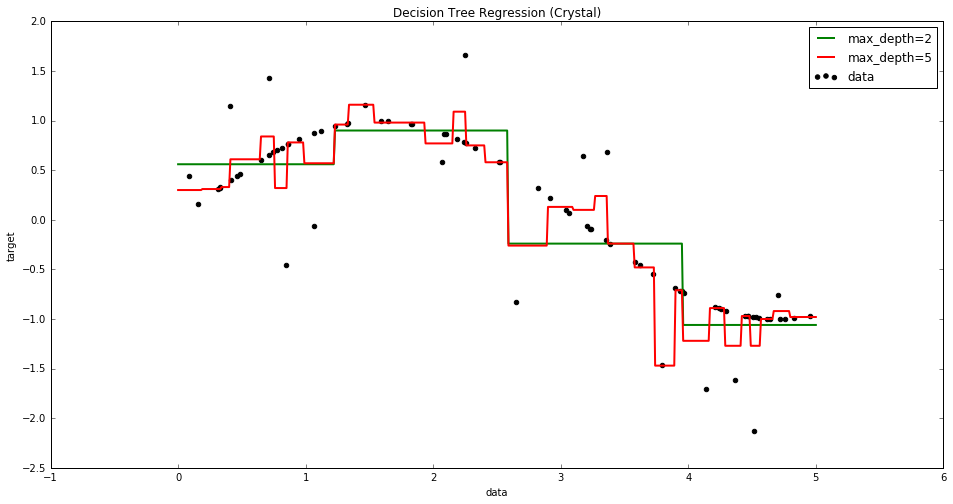

In [28]:
import pandas as pd
data = pd.read_csv('regressor.csv', names = ["x", "y", "kind"])
data_true = data[data.kind == "true"]
data_pred2 = data[data.kind == "pred_2"]
data_pred5 = data[data.kind == "pred_5"]


X = np.array(data_true.x)
y = np.array(data_true.y)

X_test = np.array(data_pred.x)
y_pred2 = np.array(data_pred2.y)
y_pred5 = np.array(data_pred5.y)


plt.figure()
plt.scatter(X, y, c="k", label="data")
plt.plot(X_test, y_pred2, c="g", label="max_depth=2", linewidth=2)
plt.plot(X_test, y_pred5, c="r", label="max_depth=5", linewidth=2)
plt.xlabel("data")
plt.ylabel("target")
plt.title("Decision Tree Regression (Crystal)")
plt.legend()
plt.show()

In [32]:
from sklearn import tree
tree.export_graphviz(regr_1, out_file='tree.dot')